Import libarries

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Inport data

In [55]:
data = pd.read_csv('../input/train.csv')

Describe current data

In [56]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Peak into the data

In [57]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Data Analysis

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Passenger Class ('Pclass)

In [59]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Gender ('Sex')

In [60]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Number of siblings ('SibSp')

In [61]:
data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Age ('Age')

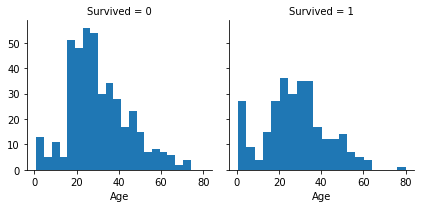

In [62]:
grid = sns.FacetGrid(data, col='Survived')
grid.map(plt.hist, 'Age', bins = 20)

## Pclass Graph

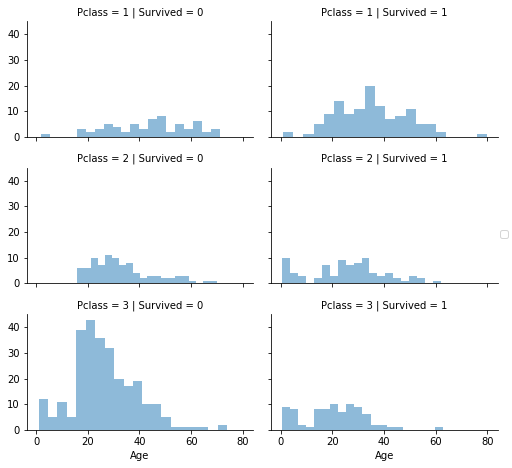

In [63]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Gender

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


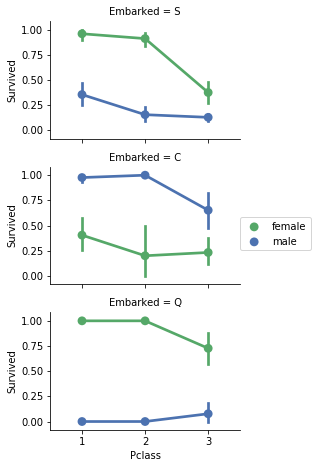

In [64]:
grid = sns.FacetGrid(data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Extract Titles

In [65]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'],data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### Title cleanup

In [66]:
title = data['Title']
title = title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
replace_map = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
title = title.replace(replace_map)
data['Title'] = title

data[['Title','Survived']].groupby(['Title'],as_index=False).mean()

title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
data['Title'] = data['Title'].map(title_map)
data['Title'] = data['Title'].fillna(0)
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      3  
2      0  STON/O2. 3101282   7.9250   NaN        S      2  
3      0            113803  53.1000  C123        S      3  
4      0            

## Other Data Cleanup

In [67]:

#print(np.count_nonzero(~np.isnan(data['Sex'])))
#print(data['Sex'].size)
print(data['Sex'].describe())
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
print(data['Sex'].describe())
#.astype(int)
y = data['Survived']
drop = ['Ticket', 'Cabin', 'Survived', 'Name', 'PassengerId']
X = data.drop(drop,axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
print(train_X.head())

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64
     Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
35        1    0  42.0      1      0  52.0000        S      1
46        3    0   NaN      1      0  15.5000        Q      1
453       1    0  49.0      1      0  89.1042        C      1
291       1    1  19.0      1      0  91.0792        C      3
748       1    0  19.0      1      0  53.1000        S      1


### Handle case where age is unknown

In [73]:
guess_ages = np.zeros((2,3))
guess_ages

for i in range(0,2):
    for j in range(0,3):
        guess_df = data[(data['Sex'] == i) &(data['Pclass'] == j+1)]['Age'].dropna()
        
        age_guess = guess_df.median()
        
        guess_ages[i,j] = int(age_guess/0.5 +0.5) *0.5

    for i in range(0,2):
        for j in range(0,3):
            data.loc[(data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1), 'Age'] = guess_ages[i,j]
        
    data['Age'] = data['Age'].astype(int)
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      1  
1          PC 17599  71.2833   C85        C      3  
2  STON/O2. 3101282   7.9250   NaN        S      2  
3            113803  53.1000  C123        S      3  
4            373450   8.0500   NaN   

### Age

In [82]:
data['AgeBand'] = pd.cut(data['Age'],5)
data[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand', ascending=True)

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']

    


33     66
54     65
96     71
116    70
280    65
456    65
493    71
630    80
672    70
745    70
851    74
Name: Age, dtype: int64

### Train using a forest

In [ ]:

rf_model = RandomForestRegressor(random_state = 1,n_estimators = 1)

rf_model.fit(train_X,train_y)

predict_y = rf_model.predict(val_X)

print("Success prediction rate: {}".format((predict_y == val_y).sum()/val_y.size))
